# Temperature, Humidity and Pressure in Lab from 2018_08_09

Climate control unit is malfunctioning, monitoring the temperature int he CeNTREX lab with a [Yocto-Meto unit](https://www.yoctopuce.com/EN/products/usb-environmental-sensors/yocto-meteo) borrowed from Matt.  

Measurement running for several weeks.

Put in a heat load around 12:00 on 2018-08-29

Temperature and humidity are setpoints are
  * 70 degrees Fahrenheit (21.11 degrees Celcius)
  * 50%

In [5]:
def set_fontsize(ax, fs):
    """
    Function to set font sizes for axes objects
    """
    ax.tick_params(axis = 'both', which = 'major', labelsize = fs)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.title.set_size(fs)

In [6]:
import pandas as pd

data_dir = '../Data/'
fname = 'CentrexYocto_Temperature_20180809.tsv'
names = ['date', 'time', 'temperature', 'pressure', 'humidity']

df_environment = pd.read_csv(data_dir+fname, sep = '\t', header = None,
                             names = names)
df_environment['timestamp'] = pd.to_datetime(df_environment.date+' '+df_environment.time)
df_environment.head()

,date,time,temperature,pressure,humidity,timestamp
0,8/9/2018,1:07:27 PM,22.75,1005.54,50.4,2018-08-09 13:07:27
1,8/9/2018,1:07:39 PM,22.75,1005.51,50.3,2018-08-09 13:07:39
2,8/9/2018,1:07:51 PM,22.75,1005.53,50.3,2018-08-09 13:07:51
3,8/9/2018,1:08:03 PM,22.75,1005.54,50.3,2018-08-09 13:08:03
4,8/9/2018,1:08:15 PM,22.75,1005.53,50.3,2018-08-09 13:08:15


The Yocto-Meto unit is not calibrated correctly for either humidity or temperature.

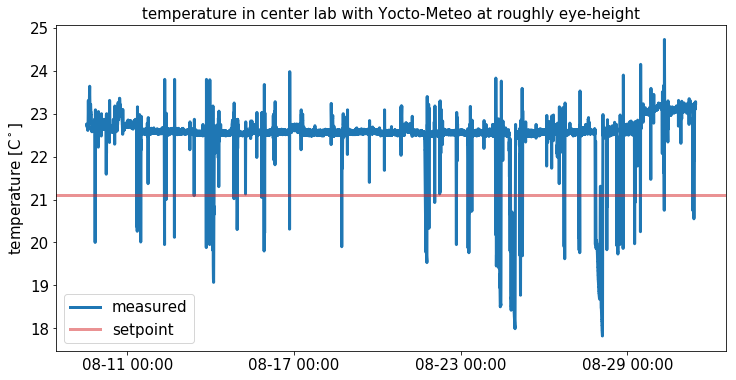

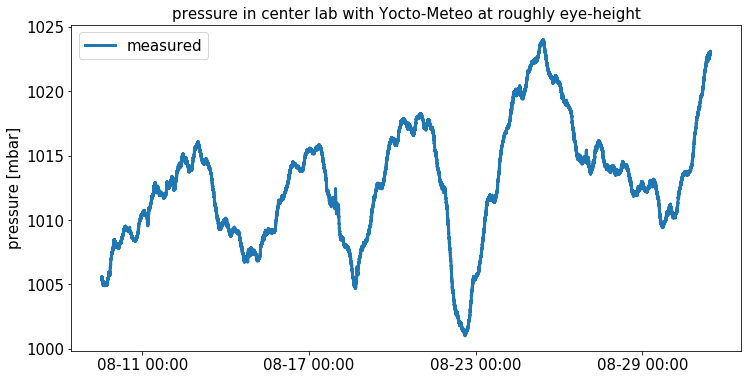

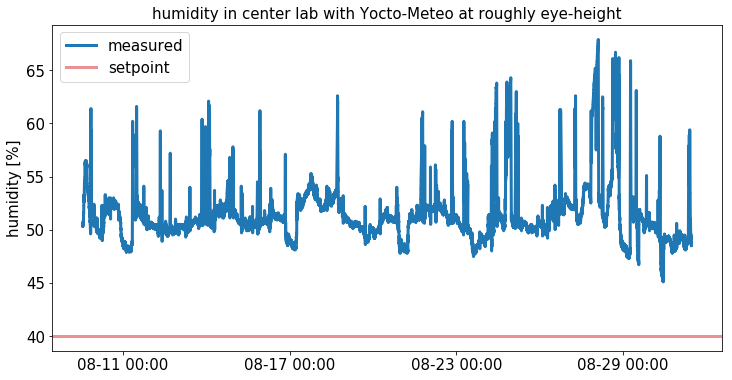

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

ylabels = {'temperature': 'temperature [C$^\circ$]', 
           'pressure': 'pressure [mbar]', 
           'humidity': 'humidity [%]'}
setpoints = {'temperature':21.111111, 'pressure':None, 'humidity':40}

for val in ['temperature', 'pressure', 'humidity']:

    fig, ax = plt.subplots(figsize = (12,6))
    ax.plot(df_environment.timestamp, df_environment[val], lw = 3,
            label = 'measured')
    ax.set_ylabel(ylabels[val])
    ax.set_title('{0} in center lab with Yocto-Meteo at roughly eye-height'.format(val))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    ax.set_xticks(ax.get_xticks()[::2])
    ax.axhline(setpoints[val], color = 'C3', lw = 3, label = 'setpoint', alpha = 0.5) \
    if setpoints[val] is not None else None
    set_fontsize(ax, 15)
    ax.legend(fontsize = 15)
    fig.savefig('{0}_lab.pdf'.format(val))

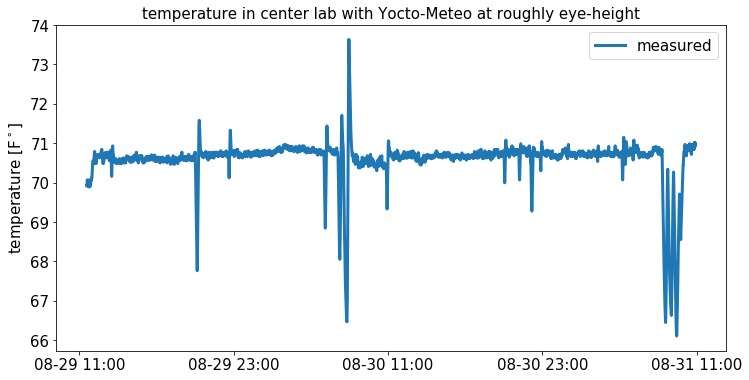

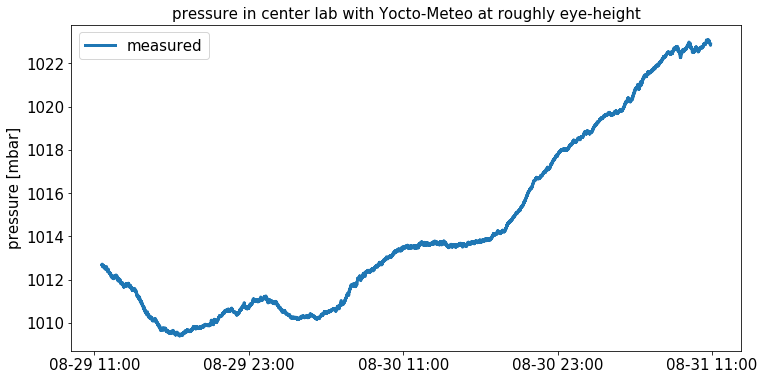

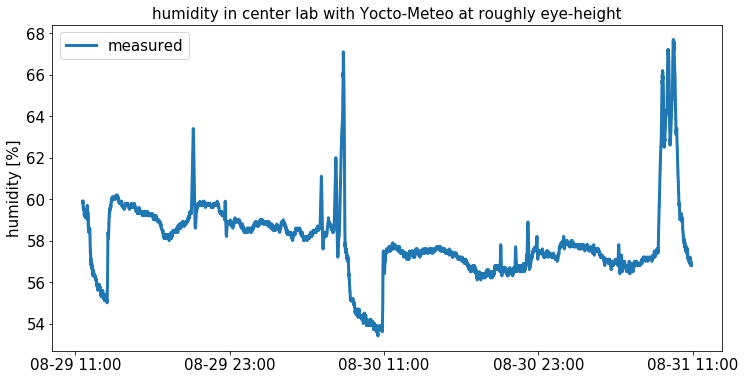

In [17]:
import datetime as dt

CelciusToFahrenheit = lambda C: 9.0/5.0 * C + 32

mask = (df_environment.timestamp >= dt.datetime(2018,8,29,11,35))

ylabels = {'temperature': 'temperature [F$^\circ$]', 
           'pressure': 'pressure [mbar]', 
           'humidity': 'humidity [%]'}
setpoints = {'temperature':21.111111, 'pressure':None, 'humidity':50}
setpoints = {'temperature':None, 'pressure':None, 'humidity':None}

for val in ['temperature', 'pressure', 'humidity']:

    fig, ax = plt.subplots(figsize = (12,6))
    if val == 'temperature':
        ax.plot(df_environment.timestamp[mask], CelciusToFahrenheit(df_environment[val][mask]-1.6), lw = 3,
                label = 'measured')
    elif val == 'humidity':
        ax.plot(df_environment.timestamp[mask], df_environment[val][mask]+8.3, lw = 3,
                label = 'measured')
        if type(setpoints[val]) != type(None):
            ax.axhspan(setpoints[val]-7.5,setpoints[val]+7.5, color = 'C1', alpha = 0.3);
    else:
        ax.plot(df_environment.timestamp[mask], df_environment[val][mask], lw = 3,
                label = 'measured')
    ax.set_ylabel(ylabels[val])
    ax.set_title('{0} in center lab with Yocto-Meteo at roughly eye-height'.format(val))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    ax.set_xticks(ax.get_xticks()[::2])
    ax.axhline(setpoints[val], color = 'C3', lw = 3, label = 'setpoint', alpha = 0.8) \
    if setpoints[val] is not None else None
    set_fontsize(ax, 15)
    ax.legend(fontsize = 15)
    fig.savefig('{0}_lab.png'.format(val))

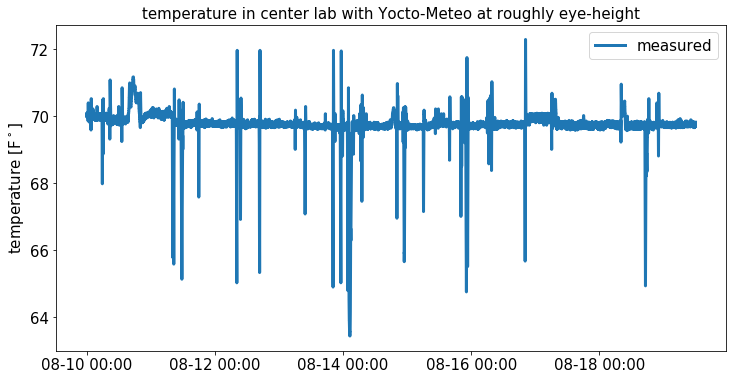

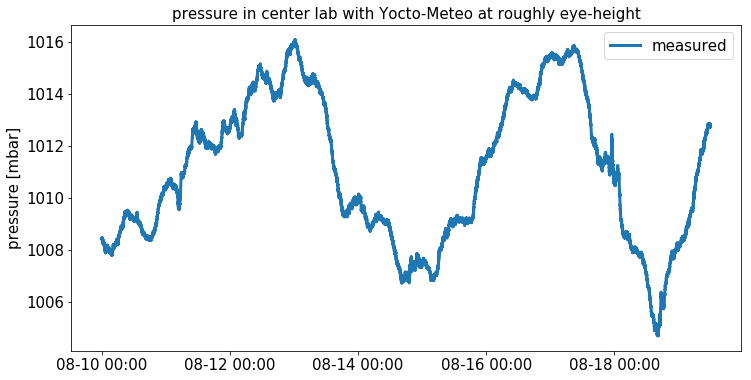

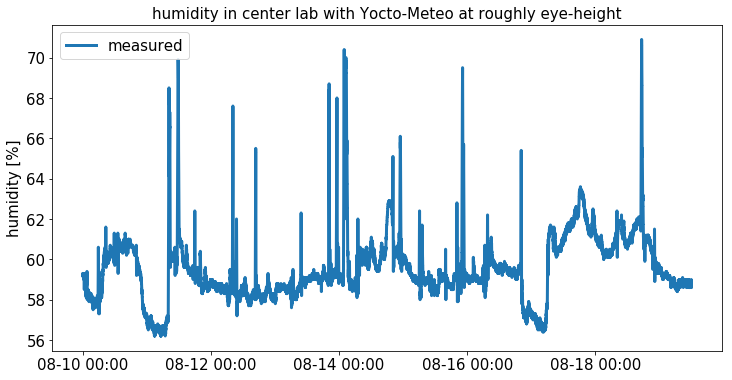

In [15]:
import datetime as dt

CelciusToFahrenheit = lambda C: 9.0/5.0 * C + 32

mask = (df_environment.timestamp >= dt.datetime(2018,8,10,0)) & (df_environment.timestamp <= dt.datetime(2018,8,19,11,59))

ylabels = {'temperature': 'temperature [F$^\circ$]', 
           'pressure': 'pressure [mbar]', 
           'humidity': 'humidity [%]'}
setpoints = {'temperature':21.111111, 'pressure':None, 'humidity':50}
setpoints = {'temperature':None, 'pressure':None, 'humidity':None}

for val in ['temperature', 'pressure', 'humidity']:

    fig, ax = plt.subplots(figsize = (12,6))
    if val == 'temperature':
        ax.plot(df_environment.timestamp[mask], CelciusToFahrenheit(df_environment[val][mask]-1.6), lw = 3,
                label = 'measured')
    elif val == 'humidity':
        ax.plot(df_environment.timestamp[mask], df_environment[val][mask]+8.3, lw = 3,
                label = 'measured')
        if type(setpoints[val]) != type(None):
            ax.axhspan(setpoints[val]-7.5,setpoints[val]+7.5, color = 'C1', alpha = 0.3);
    else:
        ax.plot(df_environment.timestamp[mask], df_environment[val][mask], lw = 3,
                label = 'measured')
    ax.set_ylabel(ylabels[val])
    ax.set_title('{0} in center lab with Yocto-Meteo at roughly eye-height'.format(val))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    ax.set_xticks(ax.get_xticks()[::2])
    ax.axhline(setpoints[val], color = 'C3', lw = 3, label = 'setpoint', alpha = 0.8) \
    if setpoints[val] is not None else None
    set_fontsize(ax, 15)
    ax.legend(fontsize = 15)
    fig.savefig('{0}_lab.png'.format(val))